# Model Performance

<img src="../fig/performance.jpg" width="600">

In [2]:
options(warn=-1)
working_dir <- '~' ## If runing locally, replace with the path to the folder in which you saved the notebooks (e.g. 'C:/Documents/mlTeachings') 
setwd(working_dir)

source('src/lib.R')

Loading required package: tidyverse
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.2     v dplyr   0.7.4
v tidyr   0.8.0     v stringr 1.3.0
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: caret
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Loading required package: keras
Loading required package: mlbench
Loading required package: ggthemes
Loading required package: assertthat

Attaching package: 'assertthat'

The following object is masked from 'package:tibble':

    has_name

Loading required package: kernlab

Attaching package: 'kernlab'

The following object is masked from 'package:purrr':

    cross

The following object is masked from 'package:ggplot

<img src="../fig/drowning_scene.jpg" width="600">

Do you remember? We left Rose with her new ML algorithm.

But how can we tell whether it is really of any help?

Let's load the trained model. and the datasets.

In [207]:
train = read_csv('data/titanic_train.csv')
(test = read_csv('data/titanic_test.csv')) %>% head

(model <- readRDS('data/titanic_model.R'))

Parsed with column specification:
cols(
  survived = col_integer(),
  pclass = col_integer(),
  sex = col_integer(),
  age = col_double(),
  sibsp = col_integer(),
  parch = col_integer(),
  fare = col_double(),
  cabin = col_integer(),
  embarked = col_integer()
)
Parsed with column specification:
cols(
  survived = col_integer(),
  pclass = col_integer(),
  sex = col_integer(),
  age = col_double(),
  sibsp = col_integer(),
  parch = col_integer(),
  fare = col_double(),
  cabin = col_integer(),
  embarked = col_integer()
)


survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1,1,2,48,0,0,26.5500,61,3
1,1,1,63,1,0,77.9583,59,3
0,1,2,71,0,0,49.5042,77,1
0,1,2,0,0,0,25.9250,77,3
1,1,1,32,0,0,76.2917,52,1
1,1,2,26,0,0,30.0000,34,1


k-Nearest Neighbors 

918 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 918, 918, 918, 918, 918, 918, ... 
Resampling results:

  Accuracy   Kappa    
  0.7286793  0.4153752

Tuning parameter 'kmax' was held constant at a value of 20
Tuning
 parameter 'distance' was held constant at a value of 0.5
Tuning
 parameter 'kernel' was held constant at a value of triangular

Let's visualize some 

In [86]:
test_response = model %>%
  predict(newdata = test %>% select(-one_of('survived')),
         type = 'raw') %>% factor

# confusionMatrix plots a few statistics

(acc = confusionMatrix(test_response, test$survived %>% factor))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 199  40
         1  40 113
                                          
               Accuracy : 0.7959          
                 95% CI : (0.7526, 0.8347)
    No Information Rate : 0.6097          
    P-Value [Acc > NIR] : 2.133e-15       
                                          
                  Kappa : 0.5712          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8326          
            Specificity : 0.7386          
         Pos Pred Value : 0.8326          
         Neg Pred Value : 0.7386          
             Prevalence : 0.6097          
         Detection Rate : 0.5077          
   Detection Prevalence : 0.6097          
      Balanced Accuracy : 0.7856          
                                          
       'Positive' Class : 0               
                                          

How can we make our minds around all these stats?

## Confusion Matrix

The first thing we see is the so-called confusion matrix? This is nothing more than a **hit matrix**, where we can have a first glance on how the model *Prediction* relates to the *Reference* (i.e. actual realization).

Ideally, we would like to see high value on the main diagonal of the Confusion Matrix, and lower value elsewhere. This would hints to the fact that the model tends to correctly predict the classes.

## True Positive

Taken one class as reference, (in a bivariate settings it is usually the target of our test), we define a *true positive* an observation belonging to the target class (i.e. the **positive** class), which has been correctly predicted .

Here below, if we consider class *1* (survived status), as our reference class, we can see that we have 113 true positive predictions.

In [25]:
acc$table

          Reference
Prediction   0   1
         0 199  40
         1  40 113

### True Negative

Conversely, taken one class as reference, (in a bivariate settings it is usually the target of our test), we define a *true negative* an observation **not** belonging to the target class (i.e. any other **negative** class), which has been correctly predicted .

Here below, if we consider class *1* (survived status), as our reference class, we can see that we have 199 true negative predictions (that is, class *0* has been correctly predicted 199 times).

In [32]:
acc$table

          Reference
Prediction   0   1
         0 199  40
         1  40 113

### False Positive

Let's start talking about errors. We have a false positive everytime our model thinks an observation belongs to the target class (i.e. the **positive** class), but it is actually wrong. 

In the titanic example, if we consider class *1* as our reference class, we can see that we have 40 false positive predictions.

In [28]:
acc$table

          Reference
Prediction   0   1
         0 199  40
         1  40 113

### False Negative

Likewise, a false negative, is any observation that actually belongs to the reference class (i.e. it **does not** belongs to any negative class), but it is classified as such.

Again, in our example we have 40 false negative.

In [30]:
acc$table

          Reference
Prediction   0   1
         0 199  40
         1  40 113

### More than two classes

As you can see. the concept of confusion matrix is easily extensible to a multivariate setting.

IF GD7 is our reference class:
- how many true positive? 136
- how many true negative? 995
- how many false positive? 7
- how many false negative? 4


<img src="../fig/multivariate_confusion_matrix.png" width="600">

Also, keep in mind that:
- $P = TP + FN$
- $N = TN + FP$

## Accuracy

From the definition of true/false positive/negative, we can mutuate the accuracy metric, defined as $ \frac{TP+TN}{P+N}$. I would rather call this metric **how many correct guesses?**

In the Titanic example our model achieves an out-of-sample accuracy of circa: $80\% = \frac{113 + 199}{113 + 199 + 40 + 40}$

In [37]:
acc$table

acc$overall[1] %>% round(2)

          Reference
Prediction   0   1
         0 199  40
         1  40 113

Accuracy 
     0.8

## Precision

Another relevant statistic is the precision, which is the ability of the model to detect properly the target (i.e. **positive** class), which is defined as $\frac{TP}{TP + FP}$

In the Titanic example our model has a precision of almost $77\% = \frac{133}{133+40}$

## Accuracy Paradox

Explain the problem with a little bit of animation possibly



In [423]:
#### TO BE FIXED


test_response_df = model %>%
  predict(newdata = test %>% select(-one_of('survived')),
         type = 'raw')  %>%
  data_frame('Response' = .) %>% mutate(Response = as.numeric(Response) -1),  Response = ifelse(Response > 0.1, 1 , 0) )

#%>% ifelse(. >= 0.1, 1, 0) %>% data_frame('Response' = .)
                                                                 
test_response_df %>% head

test_response_probabilities_df = model %>%
  predict(newdata = test %>% select(-one_of('survived')),
         type = 'prob') %>% pull('1') %>% data_frame('Probabilities' = .)
         
df = bind_cols(test_response_df %>% as.factor,
               test_response_probabilities_df,
               test %>% select(survived) %>% mutate(survived = as.factor(survived)))

options(repr.plot.width=6, repr.plot.height=3)

ggplot(df, aes(x = Probabilities, y = Response, color = survived)) +
        geom_point() +
        scale_color_manual(values = c("red", "green")) +
        theme_minimal() + ggtitle('Response Plot')

# + geom_vline(xintercept=0.5, linetype="dashed", color = 'blue')

[1] "numeric"

ERROR: Error in cbind_all(x): Argument 1 must have names


Response,Probabilities,survived
0,0.09482073,1
1,0.85388635,1
0,0.32694229,0
0,0.39902952,0
1,1.00000000,1
1,0.55963484,1


Suppose we say, *every observation with probability greater than 0.5 is classified as survived, and vice versa*

In [ ]:
acc_paradox = confusionMatrix(rep(0,acc$table %>% sum) %>% factor, test$survived %>% factor)

In [338]:
# confusionMatrix(rbinom(acc$table %>% sum, 1, 0.5) %>% factor, test$survived %>% factor)
acc_paradox = confusionMatrix(ifelse(test_response_probabilities_df > 0.5, 1, 0) %>% factor, test$survived %>% factor)
acc_paradox_2 = confusionMatrix(ifelse(test_response_probabilities_df > 0.6, 1, 0) %>% factor, test$survived %>% factor)


acc_paradox$table

acc_paradox$overall[1] %>% round(5) * 100
acc_paradox_2$overall[1] %>% round(5) * 100

          Reference
Prediction   0   1
         0 199  40
         1  40 113

Accuracy 
  79.592

Accuracy 
  79.847

In [270]:
acc$table

          Reference
Prediction   0   1
         0 199  40
         1  40 113

[1] 392

### Prevalence

Prevalence is an indicator of class unbalance.

Defined as $\frac{P}{P+N}$

In [10]:
acc$byClass[8] %>% round(2)

Prevalence 
      0.61

### No Information Rate

Indeed, prior drawing conclusion regarding the goodness of the model, we should check how much the data is biased. The **No Information Rate** could be defined as the accuracy of a random classifier (e.g. the so-called *coin toss classifier*).  

In [19]:
acc$overall[5] %>% round(2)

AccuracyNull 
        0.61

## Sensitivity

Sometimes also referred to as *recall*, *hit rate* or *true positive rate*, the sensitivity metric tells how good is the model in discriminating the reference class (i.e. **positive** class).
- In other words: *how good is the model in correctly identifying a positive as positive?*

It is defined as $\frac{TP}{P}$.

### Type II error
Is defined as 1-sensitivity.

In [22]:
acc$table

acc$byClass[1] %>% round(2)

          Reference
Prediction   0   1
         0 199  40
         1  40 113

Sensitivity 
       0.83

# Specificity

Alias *true negative rate* - opposite to sensitivity - he specificity metrics tells how good is the model in discriminating istance not in the reference class (i.e. **negative** class)


- In other words, *how good is the model in correctly identifying istances not belonging to the reference class* 

It is defined as $\frac{TN}{N}$

### Type I Error

Defined as 1-specificity


In [275]:
acc$table

acc$byClass[2] %>% round(2)

          Reference
Prediction   0   1
         0 199  40
         1  40 113

Specificity 
       0.74

Discriminating between classes can be crucial...

<img src="../fig/sensitivity_specificity.jpg" width="600">

### Type I Type II error. What's more relevant?
depending on the problem, type I or type II error may be more relevant, but in general, there is a good trade off between the two
  - in spam identification, i am better off with a high specificity, because I do not want to identify useful mail as spam
  
- in disease diagnostic, i do am better off with a high specificity, because I do not want to prescribe medicine if they are not needed.
    - you do not want to go through chemio unless strictly necessary
    - however sometimes, e.g. if you are a blood donor, you absolutely do not want to use the ematic component of a donor which is not suited to donated.
        - this is why test needs to be extremely sensitive. this comes at a cost of reducing specificity, as i am more likely to identify a false positive. You want to be very sure not to receive blood from someone with the syphilis
        
### Recap       
 
<img src="../fig/summary_confusion_matrix.png" width="600">

### Back to a multiclass setting

Again, you can extend the concept of sensitivity and specificity to a multivariate problem.

Defined a reference class, you treat is a the **positive**, all the othes as a larger, unique, **negative** class.

<img src="../fig/multivariate_confusion_matrix.png" width="600">

## A big question.

- Is there a way to have an indicator agnostic to the effect of prevalence?

<img src="../fig/so_what.jpg" width="600">


       - Yes
    Actually, there's a few

### Kohen's K

$$\frac{\text{Accuracy - No Information Rate}}{1 - \text{No Information Rate}}$$

In [52]:
acc$table

acc$overall[2] %>% round(2)

          Reference
Prediction   0   1
         0 199  40
         1  40 113

Kappa 
 0.57

### Balanced Accuracy

$$ (\text{Sensitivity + Specificity})* \frac{1}{2} $$

In [57]:
acc$byClass[11] %>% round(2) ## find the right function call

Balanced Accuracy 
             0.79

### Receiver Operating Characteristics

Graphically shows the trade off between sensitivity and specificity

#### Historical note

The ROC curve was first used during World War II for the analysis of radar signals before it was employed in signal detection theory. Following the attack on Pearl Harbor in 1941, the United States army began new research to increase the prediction of correctly detected Japanese aircraft from their radar signals. For this purposes they measured the ability of radar receiver operators to make these important distinctions, which was called the Receiver Operating Characteristics.

<img src="../fig/roc.jpg" width="400">

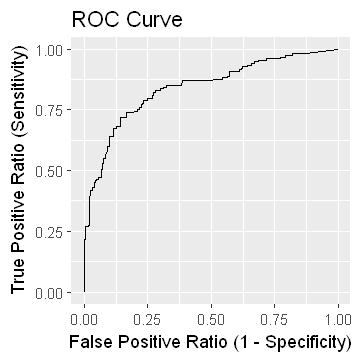

In [159]:
test_response_probabilities = model %>%
  predict(newdata = test %>% select(-one_of('survived')),
         type = 'prob') %>% pull('1')

options(repr.plot.width=3, repr.plot.height=3)

roc(test_response_probabilities, test$survived %>% factor)[2:3] %>%
    as.data.frame.list %>%
    as_data_frame %>% ggplot(aes(x = fpr, y = tpr)) + geom_line() + ggtitle('ROC Curve') +
    xlab('False Positive Ratio (1 - Specificity)') + 
    ylab('True Positive Ratio (Sensitivity)')


The best model is the one that better manages the **trade off** between **sensitivity** and **specificity**
- that is to say, the more skewed the curve towards the **top left corner**, the better

## Area Under (Receiver Operating Characteristic) Curve

This is straghtforward

In [211]:
roc(test_response_probabilities, test$survived %>% factor) %>% auc %>% round(2) %>% list('AUC' = .) %>% unlist

AUC 
0.84

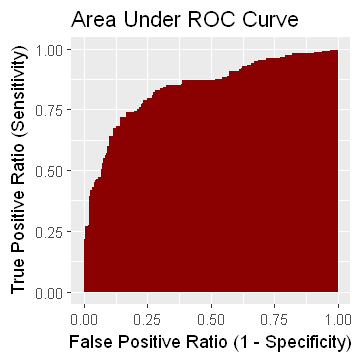

In [212]:
roc(test_response_probabilities, test$survived %>% factor)[2:3] %>%
    as.data.frame.list %>%
    as_data_frame %>% ggplot(aes(x = fpr, y = tpr)) +
    ggtitle('Area Under ROC Curve') +
    geom_ribbon(aes(ymin = 0, ymax = tpr), fill = 'darkred') +
    xlab('False Positive Ratio (1 - Specificity)') + 
    ylab('True Positive Ratio (Sensitivity)')

## Accuracy Ratio (Gini Index)

The AUC value can be misleading in that, depite taking values between 0 and 1, the baseline classifier (i.e. the *coin toss* discriminator) has a AUC of 0.5. To solve this problem, we normalize the AUC metrics by the following transormation.

$ \text{AR} = 2 \cdot (\text{AUC}) - 1$

In this way, the random discriminator has an Accuracy Ratio equal to zero.

In [220]:
roc(test_response_probabilities, test$survived %>% factor) %>% auc(.) %>% round(2)*2-1 %>% list('AR' = .) %>% unlist

AR 
0.68

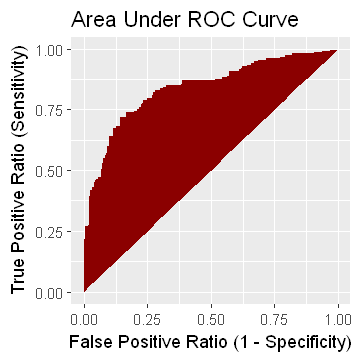

In [202]:
roc(test_response_probabilities, test$survived %>% factor)[2:3] %>%
    as.data.frame.list %>%
    as_data_frame %>% ggplot(aes(x = fpr, y = tpr)) +
    ggtitle('Area Under ROC Curve') +
    geom_ribbon(aes(ymin = fpr, ymax = tpr), fill = 'darkred') +
    xlab('False Positive Ratio (1 - Specificity)') + 
    ylab('True Positive Ratio (Sensitivity)')

### Aaand.. back to multivariate
- when sample are **unbalanced**
 1. Volume under surface.
     - No interpretation
     - $O(n^2)$
     
     <img src="../fig/vuc.jpg">
     
 2. **weighted** AUROC.
     - [toxic comment](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/leaderboard) classification challenge


- when sample **unbalance is less important**
    1. accuracy is totally fine (in mnist the sample is e.g. perfectly balanced)

    <img src="../fig/mnist.png" width="400">
 
- others
    - object segmentation: **IoU** (intersection over union)
        - which pixels belongs to a certain object?

    <img src="../fig/iou.png" width="400">

## Back to Titanic

We have seen that our model achieves fairly good performances. (To be honest, you should compare them with other model, but, in general, > 0.5 AR are considerably good). You can try other model and compare them!

In [221]:
model

k-Nearest Neighbors 

918 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 918, 918, 918, 918, 918, 918, ... 
Resampling results:

  Accuracy   Kappa    
  0.7286793  0.4153752

Tuning parameter 'kmax' was held constant at a value of 20
Tuning
 parameter 'distance' was held constant at a value of 0.5
Tuning
 parameter 'kernel' was held constant at a value of triangular

#### But
We said Rose is interested in men between 18 and 40 yo. What we can say about performance for this peculiar subclass? Let's find it out!

In [251]:
test_response_male = model %>%
  predict(newdata = test %>% select(-one_of('survived')) %>%
                        filter(sex == 2, age > 18, age < 40), ## male = 2 (due to factor conversion)
         type = 'raw') %>% factor

In [259]:
confusionMatrix(test_response,
                test %>% filter(sex == 2, age > 18, age < 40) %>% pull(survived) %>% factor)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 80 16
         1  6 10
                                          
               Accuracy : 0.8036          
                 95% CI : (0.7178, 0.8726)
    No Information Rate : 0.7679          
    P-Value [Acc > NIR] : 0.21905         
                                          
                  Kappa : 0.3636          
 Mcnemar's Test P-Value : 0.05501         
                                          
            Sensitivity : 0.9302          
            Specificity : 0.3846          
         Pos Pred Value : 0.8333          
         Neg Pred Value : 0.6250          
             Prevalence : 0.7679          
         Detection Rate : 0.7143          
   Detection Prevalence : 0.8571          
      Balanced Accuracy : 0.6574          
                                          
       'Positive' Class : 0               
                                          

AR 
0.32

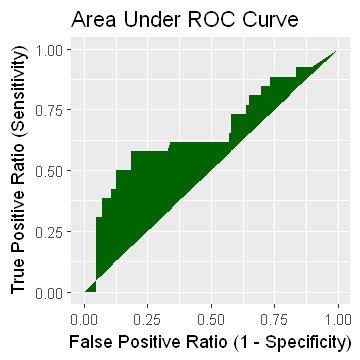

In [268]:
test_response_male_probabilities = model %>%
  predict(newdata = test %>% select(-one_of('survived')) %>%
                        filter(sex == 2, age > 18, age < 40), ## male = 2 (due to factor conversion)
         type = 'prob') %>% pull('1')

roc(test_response_male_probabilities, 
       test %>% filter(sex == 2, age > 18, age < 40) %>% pull(survived) %>% factor) %>%
        auc(.) %>% round(2)*2-1 %>% list('AR' = .) %>% unlist

roc(test_response_male_probabilities,
    test %>% filter(sex == 2, age > 18, age < 40) %>% pull(survived) %>% factor)[2:3] %>%
    as.data.frame.list %>%
    as_data_frame %>% ggplot(aes(x = fpr, y = tpr)) +
    ggtitle('Area Under ROC Curve') +
    geom_ribbon(aes(ymin = fpr, ymax = tpr), fill = 'darkgreen') +
    xlab('False Positive Ratio (1 - Specificity)') + 
    ylab('True Positive Ratio (Sensitivity)')

### Good luck, Rose!  ;)
<img src="../fig/drowning_scene.jpg" width="600">